In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
images = np.load('/Users/martin/Sites/datasets/alentic/mae/testing_dataset.npy') / 255

In [8]:
import numpy as np
from skimage.draw import disk


def mask_random_pixels(image, mask_value, fraction_pixels, min_distance):
    img = image.copy()
    _, rows, cols = img.shape
    num_pixels = int(fraction_pixels * rows * cols)

    # Initialize mask with zeros; same size as the input image
    mask = np.zeros_like(img)

    for _ in range(num_pixels):
        masked = False
        while not masked:
            x, y = (np.random.randint(min_distance, rows - min_distance),
                    np.random.randint(min_distance, cols - min_distance))
            min_distance_mask = disk((x, y), radius=min_distance)
            if np.all(img[:, min_distance_mask[0], min_distance_mask[1]] != mask_value):
                img[:, x, y] = mask_value
                mask[:, x, y] = 1  # Indicate this spot on the mask
                masked = True
    return img, mask


In [13]:
sample = images[4][:3, :, :]
masked_image, mask = mask_random_pixels(sample, mask_value=0, fraction_pixels=0.15, min_distance=2)

In [14]:
masked_image.shape

(3, 256, 256)

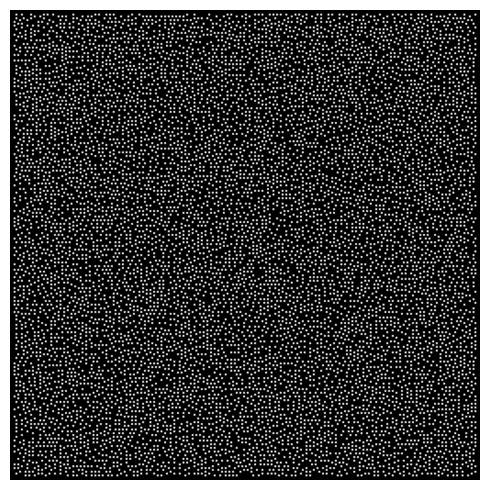

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask.transpose(1, 2, 0))
plt.axis('off')

plt.tight_layout()
plt.show()

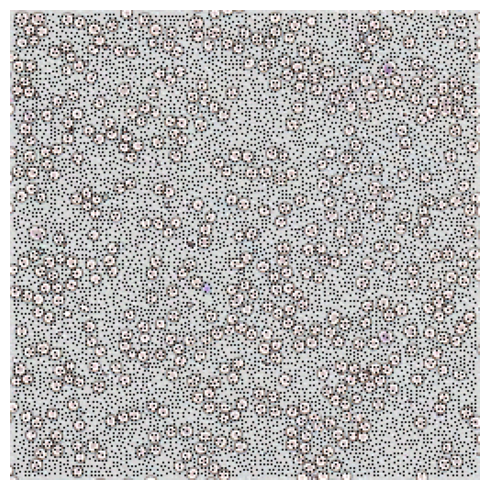

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(masked_image.transpose(1, 2, 0))
plt.axis('off')

plt.tight_layout()
plt.show()

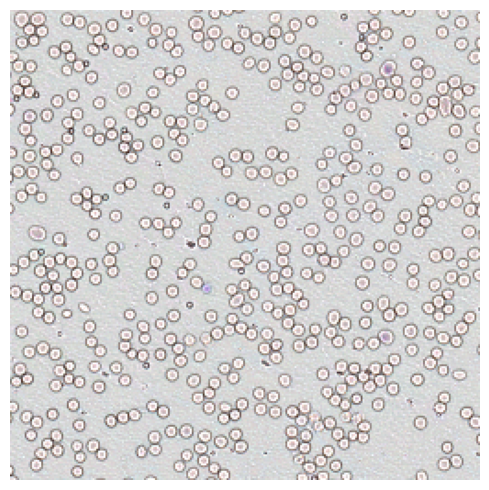

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample.transpose(1, 2, 0))
plt.axis('off')

plt.tight_layout()
plt.show()